In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv',encoding = "ISO-8859-1")

In [3]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
df['cost'] = df['COST (£) charged to Wellcome (inc VAT when charged)']

In [4]:
df = df.drop(['COST (£) charged to Wellcome (inc VAT when charged)'], axis=1)

In [5]:
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title', 'cost'], dtype='object')

 Using this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013,determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal . You will need to do considerable data cleaning in order to extract accurate estimates. For a real bonus round, identify the open access prices paid by subject area.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID       1928 non-null object
Publisher        2127 non-null object
Journal title    2126 non-null object
Article title    2127 non-null object
cost             2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


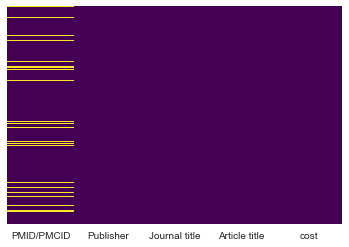

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df['Journal title'].value_counts().head(5)
# first look at JT we can see that there are a lot of different inputs for the same thing

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
Name: Journal title, dtype: int64

In [9]:
df['Journal title'].value_counts()
# taking a more detailed look, can also see that white spacing is a problem

PLoS One                                                   92
PLoS ONE                                                   62
Journal of Biological Chemistry                            48
Nucleic Acids Research                                     21
Proceedings of the National Academy of Sciences            19
Human Molecular Genetics                                   18
PLoS Neglected Tropical Diseases                           18
Nature Communications                                      17
Neuroimage                                                 15
PLoS Pathogens                                             15
PLoS Genetics                                              15
PLOS ONE                                                   14
BMC Public Health                                          14
NeuroImage                                                 14
Brain                                                      14
Movement Disorders                                         13
Biochemi

In [10]:
df['Journal title'].str.lower().value_counts().head(5)
# converting all title into lower case

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos genetics                       24
plos pathogens                      24
Name: Journal title, dtype: int64

In [11]:
df['Journal title'] = df['Journal title'].str.lower()
# saving the change to JT

In [12]:
df['Journal title'] = df['Journal title'].str.strip()
# now lets remove the extra white spaces

In [13]:
df['Journal title'].value_counts().head()
# Finally we have our top 5 journals 

plos one                           190
journal of biological chemistry     53
neuroimage                          29
nucleic acids research              26
plos genetics                       24
Name: Journal title, dtype: int64

In [14]:
# next lets look into their cost

In [15]:
df[df['Journal title'] == 'plos one']['cost']
# we can see a lot of flawed data, like the 999,999 and we can also see repeats.

1282      £1001.03
1283      £1004.15
1284      £1011.45
1285      £1011.45
1286      £1015.73
1287      £1023.41
1288      £1039.87
1289      £1061.24
1290      £1061.24
1291      £1061.24
1292      £1080.00
1293       £794.93
1294       £809.29
1295       £819.34
1296       £854.96
1297       £901.50
1298       £902.12
1299       £903.89
1303      £1061.93
1304       £389.73
1305       £443.38
1414      £1002.86
1415      £1005.86
1416      £1005.96
1417      £1008.97
1418      £1009.98
1419      £1010.80
1420      £1013.03
1421      £1019.76
1422      £1027.73
           ...    
1553       £896.32
1554       £896.96
1555       £896.99
1556       £897.19
1557       £897.61
1558       £897.61
1559       £899.34
1560    £999999.00
1561    £999999.00
1562    £999999.00
1563    £999999.00
1564    £999999.00
1565    £999999.00
1566    £999999.00
1567       £900.14
1568       £904.34
1569       £907.08
1570       £908.01
1571       £909.99
1572       £910.20
1573       £913.36
1574       £

In [16]:
md = df[df['Journal title'] == 'plos one']['cost'].mode()

In [17]:
f = df['cost'].str.split('£',expand=True)
# here I am removing the $ to convert the column to a numerical column

In [18]:
df['cost'] = f[1]

In [19]:
df['cost'] = pd.to_numeric(df['cost'])
# now we have numeric values for the cost category

In [20]:
df.iloc[1560:1567]['cost'] = md
# next im going to replace the flawed data with the mode

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df[df['Journal title'] == 'plos one']['cost'].mean()
# this median still seems too high

38751.29136842105

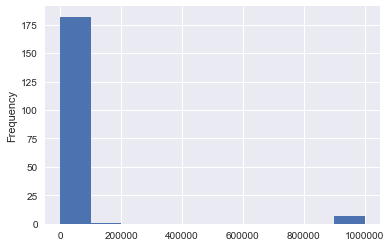

In [22]:
df[df['Journal title'] == 'plos one']['cost'].plot(x=len(df['Journal title']),kind='hist')


In [23]:
df[df['cost'] > 4000] = None
# create null values for errors

In [24]:
# I think I could make a function to write all 5 of the top journals

In [25]:
df[df["Journal title"] == 'plos one']['cost'].mean()

934.6558241758228

In [26]:
a = df[df["Journal title"] == 'plos one']['cost']

In [27]:
a.mean()

934.6558241758228

In [28]:
a.mode()

0    825.68
dtype: float64

In [29]:
a.median()

896.975

In [30]:
b = df[df['Journal title'] == 'journal of biological chemistry']['cost']

In [31]:
b.mean()

1423.5884615384614

In [32]:
b.mode()

0    1276.08
1    1556.61
dtype: float64

In [33]:
b.median()

1301.1399999999999

In [34]:
df['Journal title'].value_counts().head()

plos one                           182
journal of biological chemistry     52
neuroimage                          29
nucleic acids research              26
plos pathogens                      22
Name: Journal title, dtype: int64

In [35]:
c = df[df['Journal title'] == 'neuroimage']['cost']

In [36]:
c.mean()

2215.168275862069

In [37]:
c.median()

2326.43

In [38]:
c.mode()

0    1762.69
1    2503.34
dtype: float64

In [39]:
d = df[df['Journal title'] == 'proceedings of the national academy of sciences']['cost'] 

In [40]:
d.mean()

793.0122727272726

In [41]:
d.mode()

0      206.32
1      395.60
2      603.42
3      605.17
4      614.95
5      617.79
6      660.59
7      662.09
8      663.30
9      664.89
10     732.25
11     751.84
12     759.30
13     765.36
14     770.75
15     779.69
16     786.98
17     792.00
18     793.02
19     888.18
20    1241.10
21    2691.68
dtype: float64

In [42]:
d.median()

742.0450000000001

In [43]:
e = df[df['Journal title'] == 'nucleic acids research']['cost'] 

In [44]:
e.mean()

1149.0

In [45]:
e.median()

852.0

In [46]:
e.mode()

0    852.0
dtype: float64

In [47]:
# come back an use ML to fill in nulls

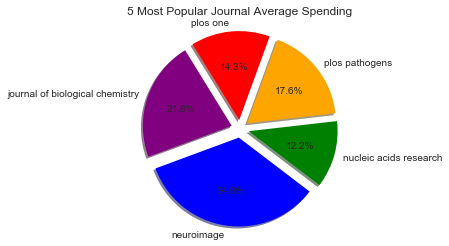

In [53]:
plt.title("5 Most Popular Journal Average Spending")
labels = 'plos one', 'journal of biological chemistry','neuroimage','nucleic acids research','plos pathogens'
sizes = [a.mean(),b.mean(),c.mean(),d.mean(),e.mean()]
colors = ['red','purple','blue','green','orange']
explode = [0.1,0.1,0.1,0.1,0.1]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=70)

plt.axis('equal')
plt.show()

In [48]:
df['Journal title'].value_counts().head()

plos one                           182
journal of biological chemistry     52
neuroimage                          29
nucleic acids research              26
plos pathogens                      22
Name: Journal title, dtype: int64